<a href="https://colab.research.google.com/github/katherinelynne/Python-Portfolio/blob/main/Predicting_Engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/bank-full.csv"
bank = pd.read_csv(file_name, delimiter=';')

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
# Taking a look at the data 

print ("Rows : ", bank.shape[0])
print ("Columns  : ", bank.shape[1])
print ("\nFeatures : \n", bank.columns.tolist())
print ("\nMissing values : ", bank.isnull().sum().values.sum())
print ("\nUnique values :  \n", bank.nunique())

Rows :  45211
Columns  :  17

Features : 
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Missing values :  0

Unique values :  
 age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


In [13]:
# To find outliers or errors in data
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [22]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'converted'],
      dtype='object')

In [20]:
# Using the 'apply' function to transform 'y' from yes or no to 0s and 1s
bank['converted'] = bank['y'].apply(lambda x: 0 if x == 'no' else 1)
del bank['y']
bank.head()

KeyError: ignored

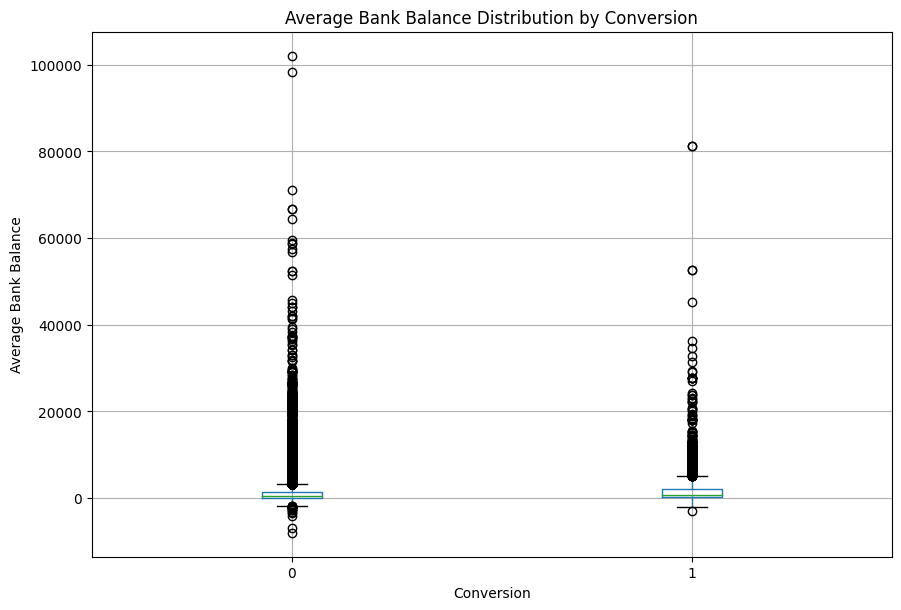

In [24]:
# Visualize how our output variable (converted) changes with different incomes
ax = bank[['converted', 'balance']].boxplot(by='converted', showfliers=True, figsize=(10,7))

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distribution by Conversion')

plt.suptitle("")
plt.show()

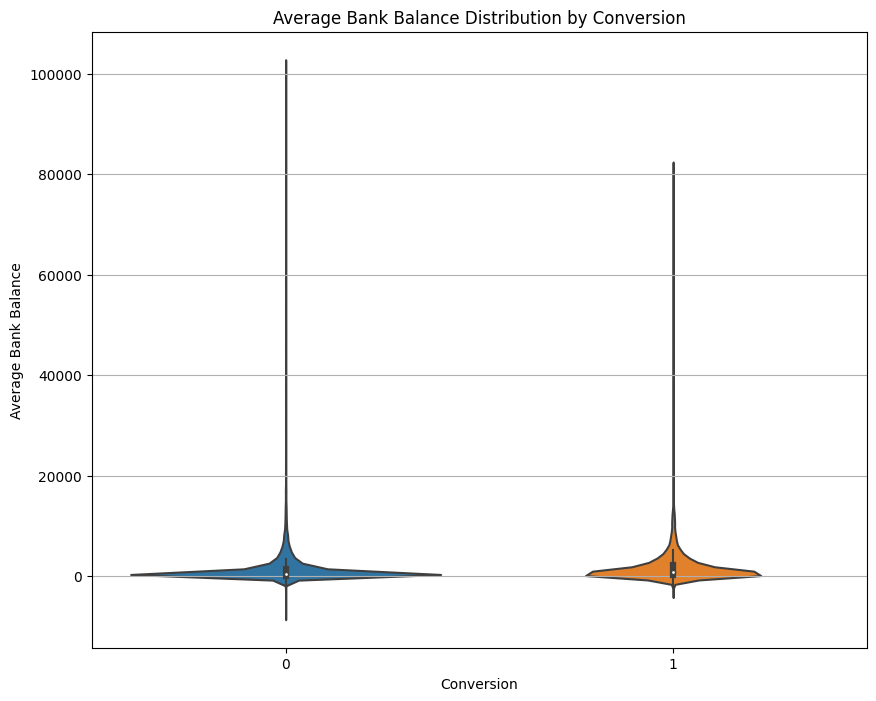

In [28]:
# Doing the same thing with violin plots
import seaborn as sns

fontsize = 10

fig, axes = plt.subplots()
# plot violin, 'Scenario' is according to x axis,
# 'LMP' is y axis, data is your dataframe, ax = is axes instance

fig.set_size_inches(10,8)

sns.violinplot(data=bank, x='converted', y='balance', ax = axes)
axes.set_title('Average Bank Balance Distribution by Conversion')

axes.yaxis.grid(True)
axes.set_xlabel('Conversion')
axes.set_ylabel('Average Bank Balance')

plt.show()

The bulk of the data still lies in one potion however, we can see there is a bit of a larger portion people who converted tend to make slightly more money.

In [29]:
# there were a lot of unique marketing campaigns.
bank['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [36]:
# The percentage of conversions for each campaign in the bank dataset.
# first group by the campaign and for each group, compute the sum of the converted column, which represents the number of successful conversions for that campaign.
# Divie the sum by the count of converted values for that campaign
# Multiply the porportion by 100 to get percentage of conversions for that campaign.
conversions_by_contacts = bank.groupby('campaign')['converted'].sum() / bank.groupby('campaign')['converted'].count() * 100.0
# Let's see the top ten campaign in terms of % converted
conversions_by_contacts.head(10)

campaign
1     14.597583
2     11.203519
3     11.193624
4      9.000568
5      7.879819
6      7.126259
7      6.394558
8      5.925926
9      6.422018
10     5.263158
Name: converted, dtype: float64

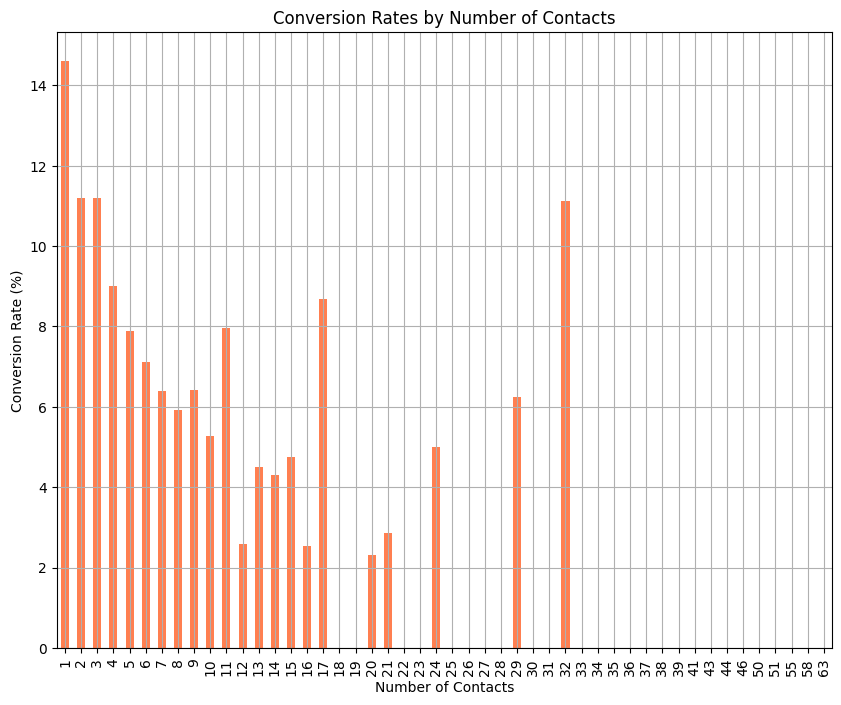

In [42]:
ax = conversions_by_contacts.plot(
    kind='bar',
    figsize=(10,8),
    title='Conversion Rates by Number of Contacts',
    grid=True,
    color='coral'
)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

conversion rate by number of contacts shows as the number of contacts increases the rate of conversion decreases. 

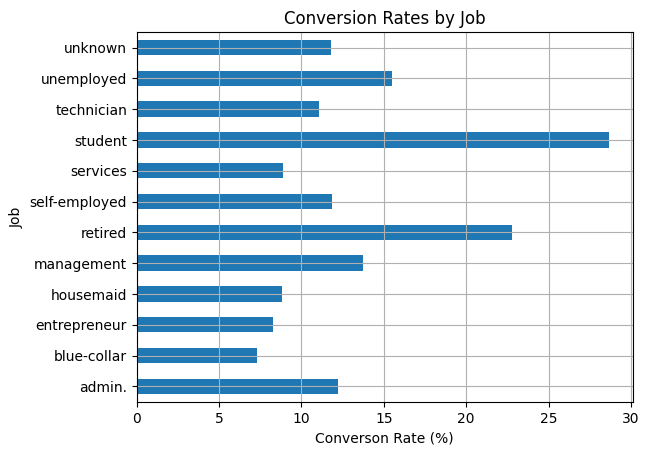

In [43]:
# Conversion rate by job
# We see students have the highest conversion rate higher than retirees. 
conversion_rate_by_job = bank.groupby(by='job')['converted'].sum() / bank.groupby(by='job')['converted'].count() * 100.0
ax = conversion_rate_by_job.plot(kind='barh', grid=True, title='Conversion Rates by Job')

ax.set_xlabel('Converson Rate (%)')
ax.set_ylabel('Job')

plt.show()

In [44]:
# Stopped at 5:08